# Generate REMI Encoding
This notebook generate REMI encoding for all the MIDI files in the assigned directory. Only for melody track.

## Settings

In [5]:
dir_name = 'lmd_ts_10k'
mid_dir = '../../data/%s' % dir_name
save_path = '../../data/new_remi_encoding/%s/tokenization' % dir_name
melody_dict_path = '../../data/main_melody_info/melody_midi_dict.json'

os.makedirs(save_path, exist_ok=True)

## Start to Process

In [3]:
import os
import json
from collections import defaultdict
from tqdm import tqdm

from midi_processing import *

In [6]:
with open(melody_dict_path, 'r') as f:
    melody_dict = json.load(f)

In [13]:
train_list = 'D:/Programs/MusicPretrain/data/data_split/lmd_ts_10k/train_short_list.json'
valid_list = 'D:/Programs/MusicPretrain/data/data_split/lmd_ts_10k/valid_short_list.json'
test_list = 'D:/Programs/MusicPretrain/data/data_split/lmd_ts_10k/test_short_list.json'

In [11]:
pcs = MidiProcessor()

In [17]:
for set_name, list_path in (('train', train_list), ('valid', valid_list), ('test', test_list)):
    print(set_name)
    with open(list_path, 'r') as f:
        set_file_list = json.load(f)
    with tqdm(total=len(set_file_list)) as pbar:
        with open(os.path.join(save_path, set_name+'.token'), 'w', encoding='utf-8') as f:
            for midi_file_name in set_file_list:
                pbar.update(1)
                midi_file_path = os.path.join(mid_dir, midi_file_name)
                encodings = pcs.encode_file(midi_file_path, max_encoding_length=1022, tracks=int(melody_dict[midi_file_name]))
                encodings_str = pcs.encodings_to_str_lists(encodings)
                
                for encoding_str in encodings_str:
                    f.write(' '.join(encoding_str) + '\n')
                f.write('\n')

100%|██████████| 600/600 [02:06<00:00,  4.75it/s]


OSError: [Errno 22] Invalid argument: 'D:/Programs/MusicPretrain/data/data_split/lmd_ts_10k\x0balid_short_list.json'

In [6]:
length_statistics = []
something_wrong = []

for root_dir, dirs, files in os.walk(mid_dir):
    print('process dir: %s' % root_dir)
    with tqdm(total=len(files)) as pbar:
        for file_name in files:
            pbar.update(1)
            if not file_name.endswith('.mid'):
                continue
            file_path = os.path.join(root_dir, file_name)
            
            try:
                remi_sequence = generate_remi_sequence_from_midi(file_path, instrument=int(melody_dict[file_name]))
            except:
                something_wrong.append(file_name)
                tqdm.write('Something wrong: %s' % file_name)
                continue

            length_statistics.append(len(remi_sequence))
            
            with open(os.path.join(save_path, file_name + '.json'), 'w', encoding='utf-8') as f:
                json.dump(remi_sequence, f, ensure_ascii=False)

  0%|          | 13/10000 [00:07<1:54:46,  1.45it/s]C:\Users\v-botaoyu\Anaconda3\lib\site-packages\pretty_midi\pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
100%|██████████| 10000/10000 [2:05:34<00:00,  1.33it/s]


In [7]:
with open(os.path.join(save_path, 'wrong_list.log'), 'w', encoding='utf-8') as f:
    json.dump(something_wrong, f, ensure_ascii=False)
with open(os.path.join(save_path, 'length_statistics.log'), 'w', encoding='utf-8') as f:
    json.dump(length_statistics, f, ensure_ascii=False)

## Show Length Statistics

In [8]:
import numpy as np
import matplotlib.pyplot as plt

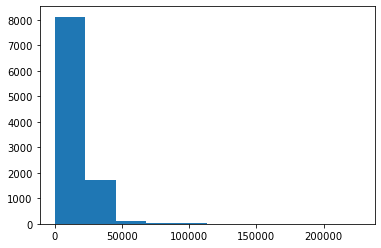

In [9]:
n, bins, patches = plt.hist(length_statistics)
plt.show()